In [5]:
import random
import math
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import partial
import statistics
import scipy.stats as stats
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import binom
%matplotlib inline
%precision 4
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from scipy.stats import beta
from functools import partial
np.random.seed(1234)


In [2]:
def rw2(n):# this gives samples from weibull(5,2)# put n=10000,the shape 5 and the scale 2
    x,y=0,0
    distance=[]
    for i in range(1,n+1):
            r=random.weibullvariate(alpha,beta) # step size r
            theta=2.*math.pi*random.random()
            x +=r*math.cos(theta)
            y +=r*math.sin(theta)
            distance.append(r)# save the distances r for the mcmc sampler
    return(np.array(distance))# depending what do you want to do, either save the pairs, or save the distances r  between points
    #return(x,y)
    
alpha=2#float(input("what's the scale?"))
beta=5#float(input("what's the shape?"))
n=10000#int(input("how many steps?"))
#tries=int(input("how many tries?"))#  put tries=1  in order to properly save the list distance
data = rw2(n)# very important because you need the same data, if you put rw2(n) in there you change the data every time


In [3]:
# calculate the log likelihood of weibull(a,b)
import scipy.stats 
from scipy.stats import dweibull
def log_likelihood(x,a,b):
     return sum(dweibull.logpdf(x,scale=b,c=a))

In [18]:
import scipy.stats as stats
import numpy as np
#n=10000 #number of observations in a sample 
# initial guess for theta(a and b) as array.
def mh(guess):
    #guess = [5.0,2.0]
# Prepare storing MCMC chain as array of arrays.
    A = [guess]
    # define stepsize of MCMC.
    stepsizes = [0.01,0.01]  # array of stepsizes
    accepted  = 0.0
    old_theta=guess# define initial values for theta 
    old_loglik = log_likelihood(data,old_theta[0],old_theta[1])#calculate the first log likelihood
# Metropolis-Hastings with 10,000 iterations.
    for p in range(10000):
    #old_theta  = A[len(A)-1]   old parameter value as array(not that elegant way)
    # Suggest new candidate from Gaussian proposal distribution.
    #new_theta = np.zeros([len(old_theta)])
        new_theta = old_theta + stats.norm(0, stepsizes).rvs() 
    #add the restraints on new_theta
        if new_theta[0]<0 or new_theta[1]<0: 
            continue
        new_loglik = log_likelihood(data,new_theta[0],new_theta[1])
    # Accept new candidate in Monte-Carlo fashing.
        if (new_loglik > old_loglik):
            A.append(new_theta)
            accepted = accepted + 1.0  # monitor acceptance
            old_loglik=new_loglik
            old_theta=new_theta
        else:
            u = random.uniform(0.0,1.0)
            if (u < math.exp(new_loglik - old_loglik)):
                A.append(new_theta)
                accepted = accepted + 1.0  # monitor acceptance
                old_loglik=new_loglik
                old_theta=new_theta
        
    print("Acceptance rate = "+str(accepted/10000.0))
    return A


In [19]:
#print(A)
guess = [5.0,2.0]
mh(guess)

Acceptance rate = 0.416


[[5.0000, 2.0000],
 array([ 4.9971,  1.9977]),
 array([ 4.9983,  1.9934]),
 array([ 4.9966,  1.9968]),
 array([ 5.0175,  1.9898]),
 array([ 5.0289,  1.9888]),
 array([ 5.0305,  2.0001]),
 array([ 5.0453,  1.9965]),
 array([ 5.0476,  1.9989]),
 array([ 5.0333,  1.9995]),
 array([ 5.0358,  1.9938]),
 array([ 5.0308,  1.995 ]),
 array([ 5.0362,  1.9958]),
 array([ 5.0389,  1.9973]),
 array([ 5.0399,  2.0005]),
 array([ 5.0304,  1.9947]),
 array([ 5.038 ,  1.9999]),
 array([ 5.0231,  1.9965]),
 array([ 5.0162,  1.9958]),
 array([ 5.028 ,  2.0019]),
 array([ 5.0174,  1.9942]),
 array([ 5.0192,  1.9998]),
 array([ 5.0281,  1.9952]),
 array([ 5.0078,  1.9942]),
 array([ 4.9971,  1.9949]),
 array([ 5.0039,  1.996 ]),
 array([ 5.002 ,  1.9967]),
 array([ 5.0033,  1.9965]),
 array([ 4.9953,  1.9949]),
 array([ 4.9994,  1.9948]),
 array([ 5.0027,  1.9956]),
 array([ 4.9861,  1.9957]),
 array([ 4.9956,  1.9943]),
 array([ 5.0121,  1.9934]),
 array([ 5.0121,  1.9945]),
 array([ 4.9982,  1.9924]),
 

In [20]:
sampless_shape = [mh([theta,2]) for theta in np.linspace(2,7,5)]# 5 mh chains for shape keeping the scale fixed at 2 and varying 
# the starting points for the shape from 2 to 7

Acceptance rate = 0.422
Acceptance rate = 0.4144
Acceptance rate = 0.4161
Acceptance rate = 0.4174
Acceptance rate = 0.4156


In [25]:
sampless_scale=[mh([5,theta]) for theta in np.linspace(1,6,5)]
#5 mh chains for scale keeping the shape fixed at 5 and varying the starting points from 1 to 3

Acceptance rate = 0.4079
Acceptance rate = 0.4242
Acceptance rate = 0.4154
Acceptance rate = 0.4133
Acceptance rate = 0.4356


In [22]:
sampless_shape

[[[2.0000, 2],
  array([ 2.012 ,  2.0084]),
  array([ 2.0159,  2.009 ]),
  array([ 2.0277,  1.9982]),
  array([ 2.0339,  1.9941]),
  array([ 2.0392,  1.982 ]),
  array([ 2.0542,  1.989 ]),
  array([ 2.0575,  1.9952]),
  array([ 2.0562,  1.9801]),
  array([ 2.0649,  1.9732]),
  array([ 2.0715,  1.9524]),
  array([ 2.0848,  1.9648]),
  array([ 2.0931,  1.9738]),
  array([ 2.0918,  1.9688]),
  array([ 2.0976,  1.9581]),
  array([ 2.1077,  1.9567]),
  array([ 2.1137,  1.9653]),
  array([ 2.1163,  1.9583]),
  array([ 2.1226,  1.9625]),
  array([ 2.1282,  1.9466]),
  array([ 2.1404,  1.9453]),
  array([ 2.1444,  1.9618]),
  array([ 2.1668,  1.9675]),
  array([ 2.1704,  1.972 ]),
  array([ 2.1689,  1.9624]),
  array([ 2.1835,  1.9719]),
  array([ 2.1979,  1.9768]),
  array([ 2.2095,  1.9747]),
  array([ 2.217,  1.962]),
  array([ 2.2334,  1.9647]),
  array([ 2.2452,  1.971 ]),
  array([ 2.2699,  1.9871]),
  array([ 2.2756,  1.9973]),
  array([ 2.2759,  1.9899]),
  array([ 2.2833,  1.9904]),
 

In [44]:
# save the posterior for a, that is shape
a=[]
for i in range(len(sampless_shape)-1):
    for j in range(len(sampless_shape[i])-1):
        a.append(sampless_shape[i-1][0])
#print(a) 
print(len(a))
#len(sampless_shape) 5 vectors of chains
print(len(sampless_shape[0]))# the first chain
print(len(sampless_shape[1]))#the second chain
print(sampless_shape[0][0])# the first pair of the first chain
# I want one vector consisting of 5 vectors each consisting of first entry of each pair

<class 'list'>
16699
4221
4145
[2.0, 2]


In [28]:
# save the posterior for b,that is scale
b=[]
for i in range(len(A)-1):
    b.append(A[i-1][1])

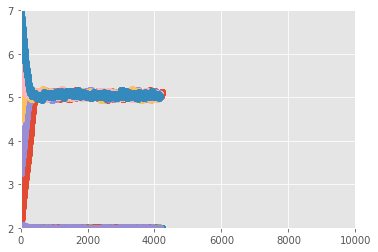

In [23]:
# Convergence of multiple chains for shape

for samples in sampless_shape:
    plt.plot(samples, '-o')
plt.xlim([0, 10000])
plt.ylim([2, 7]);

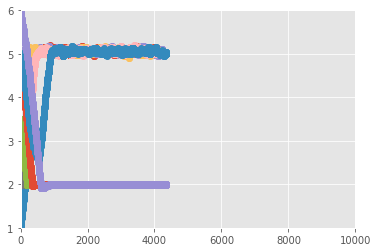

In [26]:
# Convergence of multiple chains for scale

for samples in sampless_scale:
    plt.plot(samples, '-o')
plt.xlim([0, 10000])
plt.ylim([1,6]);